In [1]:
import os
import keras
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization,Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from google.colab.patches import cv2_imshow

face detection with openCV

In [2]:
classifier = CascadeClassifier( cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [3]:
pixels = imread("4.jpg")

In [4]:
bboxes = classifier.detectMultiScale(pixels,	minNeighbors = 3,	scaleFactor = 1.1)

In [5]:
bboxes

array([[ 41,   7, 156, 156]], dtype=int32)

In [6]:
for box in bboxes:
  x,y,width,height = box;
  x2 , y2 = x+width, y + height
  rectangle(pixels,(x,y),(x2,y2),(0,0,225),1)

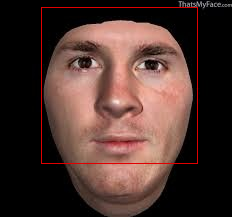

-1

In [7]:
cv2_imshow(pixels)
waitKey(0)

## face joint dectection

In [8]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.1MB/s 


In [9]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [10]:
filename = "s.jpg"

In [11]:
pixels = pyplot.imread(filename)

In [12]:
detector = MTCNN()

In [13]:
faces = detector.detect_faces(pixels)

In [14]:
for f in faces:
  print(f)

{'box': [179, 81, 39, 54], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (189, 101), 'right_eye': (209, 101), 'nose': (198, 113), 'mouth_left': (189, 121), 'mouth_right': (208, 121)}}
{'box': [105, 142, 37, 49], 'confidence': 0.9999963045120239, 'keypoints': {'left_eye': (117, 160), 'right_eye': (135, 164), 'nose': (124, 174), 'mouth_left': (113, 175), 'mouth_right': (130, 180)}}
{'box': [60, 55, 42, 58], 'confidence': 0.9999908208847046, 'keypoints': {'left_eye': (73, 79), 'right_eye': (92, 80), 'nose': (83, 93), 'mouth_left': (72, 97), 'mouth_right': (91, 98)}}
{'box': [314, 76, 37, 50], 'confidence': 0.9999306201934814, 'keypoints': {'left_eye': (324, 94), 'right_eye': (341, 96), 'nose': (331, 106), 'mouth_left': (322, 111), 'mouth_right': (339, 113)}}
{'box': [265, 108, 43, 59], 'confidence': 0.9999163150787354, 'keypoints': {'left_eye': (277, 133), 'right_eye': (297, 130), 'nose': (290, 144), 'mouth_left': (279, 152), 'mouth_right': (299, 149)}}
{'box': [129, 70, 32,

In [15]:
def draw_image_with_boxes(filename,result_list):
  data = pyplot.imread(filename)
  pyplot.imshow(data)
  ax = pyplot.gca()
  for r in result_list:
    print(r)
    x,y,w,h = r["box"]
    rectangle = Rectangle((x,y),w,h,fill = False, color="red")
    ax.add_patch(rectangle)
  pyplot.show()  

In [16]:
faces = detector.detect_faces(pixels)

{'box': [179, 81, 39, 54], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (189, 101), 'right_eye': (209, 101), 'nose': (198, 113), 'mouth_left': (189, 121), 'mouth_right': (208, 121)}}
{'box': [105, 142, 37, 49], 'confidence': 0.9999963045120239, 'keypoints': {'left_eye': (117, 160), 'right_eye': (135, 164), 'nose': (124, 174), 'mouth_left': (113, 175), 'mouth_right': (130, 180)}}
{'box': [60, 55, 42, 58], 'confidence': 0.9999908208847046, 'keypoints': {'left_eye': (73, 79), 'right_eye': (92, 80), 'nose': (83, 93), 'mouth_left': (72, 97), 'mouth_right': (91, 98)}}
{'box': [314, 76, 37, 50], 'confidence': 0.9999306201934814, 'keypoints': {'left_eye': (324, 94), 'right_eye': (341, 96), 'nose': (331, 106), 'mouth_left': (322, 111), 'mouth_right': (339, 113)}}
{'box': [265, 108, 43, 59], 'confidence': 0.9999163150787354, 'keypoints': {'left_eye': (277, 133), 'right_eye': (297, 130), 'nose': (290, 144), 'mouth_left': (279, 152), 'mouth_right': (299, 149)}}
{'box': [129, 70, 32,

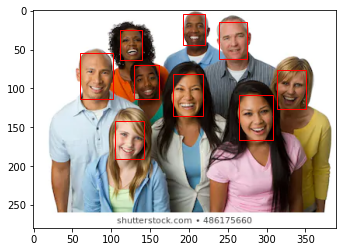

In [17]:
draw_image_with_boxes(filename,faces)

In [28]:
def draw_dots(filename,r_L):
   data = pyplot.imread(filename)
   pyplot.imshow(data)
   ax = pyplot.gca()
   for r in r_L:
    #  z,y,w,h, = r["box"]
    #  rectangle = Rectangle((x,y),w,h,fill=False,color = "red")
    #  ax.add_patch(rectangle)
     for key, value in r["keypoints"].items():
       d = Circle(value,radius=4,color = "red")
       ax.add_patch(d)
   pyplot.show()



In [29]:
dector = MTCNN()


In [30]:
faces = dector.detect_faces(pixels)

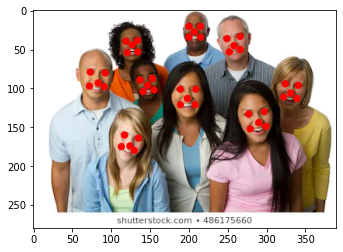

In [31]:
draw_dots(filename,faces)

In [22]:
def draw_faces(filename,r_l):
  data = pyplot.imread(filename)
  pyplot.imshow(data)

  ax = pyplot.gca()

  for i in range(len(r_l)):
    x1,y1,width,height = r_l[i]["box"]
    x2,y2 = x1+width, y1+height
    pyplot.subplot(1,len(r_l),i+1)
    pyplot.axis("off")
    pyplot.imshow(data[y1:y2,x1:x2])
    for key, value in r_l[i]["keypoints"].items():
       d = Circle(value,radius=4,color = "red")
       ax.add_patch(d)
  pyplot.show()

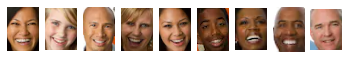

In [23]:
dector = MTCNN()
faces = dector.detect_faces(pixels)
draw_faces(filename,faces)
